<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/Seamless_Clone_Goggles_withRainDrops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'
rainPath=root_path+"/rain_drop3.jpg"
gogglesPath=root_path+"/blue_goggles1.jpg"

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Text(0.5, 1.0, 'Rain')

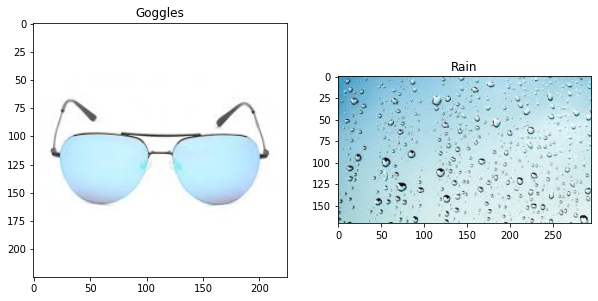

In [ ]:
imgGoggles = cv2.imread(gogglesPath,1)
if (imgGoggles.any() == None):
  print("Empty Image")

imgRain = cv2.imread(rainPath,1)
if (imgRain.any() == None):
  print("Empty Image")

plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(imgGoggles[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Goggles")
#ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(imgRain[:,:,::-1],vmin=0, vmax=255)
ax.set_title("Rain")
#ax.axis('off')

In [ ]:
imgGoggles.shape

(225, 225, 3)

In [ ]:
imgRain.shape

(171, 295, 3)

In [ ]:
cropG = imgGoggles[65:165,20:220]
cropR = imgRain[75:110,200:250]

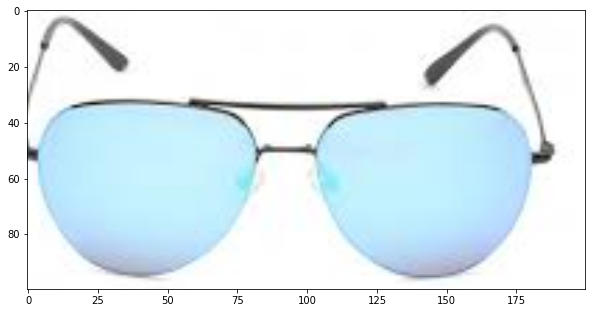

In [ ]:
plt.imshow(cropG[:,:,::-1])

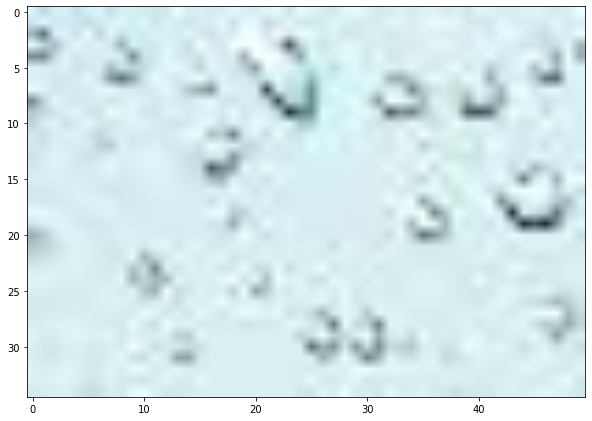

In [ ]:
plt.imshow(cropR[:,:,::-1])

In [ ]:
cropG.shape

(100, 200, 3)

In [ ]:
# Create a rough mask around the rain drops.
src_mask = np.zeros(cropR.shape, cropR.dtype)
src_mask.shape
#poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
#src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))

(35, 50, 3)

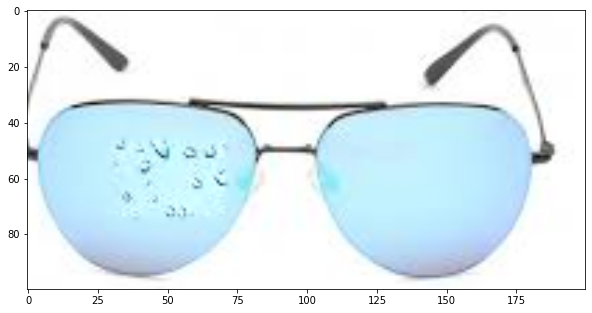

In [ ]:
src_mask1 = 255 * np.ones(cropR.shape, cropR.dtype)
center = (50,60)
output = cv2.seamlessClone(cropR,cropG, src_mask1, center, cv2.NORMAL_CLONE)
plt.imshow(output[:,:,::-1],vmin=0, vmax=255)

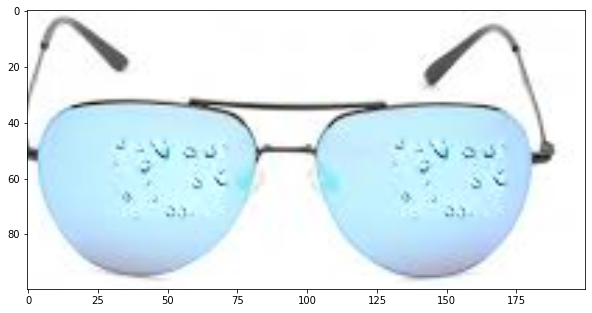

In [ ]:
center2 = (150,60)
output2 = cv2.seamlessClone(cropR,output, src_mask1, center2, cv2.NORMAL_CLONE)
plt.imshow(output2[:,:,::-1],vmin=0, vmax=255)
